# Exploratory Data Analysis (EDA) of a store

## Objective
The goal of this notebook is to perform exploratory data analysis on the retail dataset to uncover patterns, trends, and relationships in the data that may be useful for business insights or further modeling.

## Dataset Description
This dataset includes customer orders with fields such as:
- Order Date, Ship Date, Customer Info
- Segment, Region, Product Details
- Sales, Quantity, Discount, and Profit

## Key Steps Performed
- Data loading and initial inspection
- Data type conversion
- Feature engineering
- Visualizations: distribution plots, time trends, segment analysis
- Correlation analysis

## Tools Used
- pandas, numpy, matplotlib, seaborn

## Data Overview

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [56]:
df = pd.read_csv(r"D:\Data Science\github\Sales-Trend-Analysis\data\raw\store.csv")
df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,sales_year
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011


In [57]:
df.isnull().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub-category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
sales_year            0
dtype: int64

In [58]:
df.dtypes

row_id              int64
order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_id        object
customer_name      object
segment            object
city               object
state              object
country            object
postal_code       float64
market             object
region             object
product_id         object
category           object
sub-category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
sales_year          int64
dtype: object

## Data Cleaning

In [59]:
df_cleaned = df.drop(columns=['row_id', 'customer_id', 'customer_name', 'product_name', 'sales_year', 'postal_code', 'order_id' , 'sub-category', 'order_priority', 'ship_mode'])
df_cleaned.columns

Index(['order_date', 'ship_date', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost'],
      dtype='object')

In [ ]:
df = df_cleaned.copy()

In [73]:
df.dtypes

order_date          datetime64[ns]
ship_date           datetime64[ns]
segment                     object
city                        object
state                       object
country                     object
market                      object
region                      object
product_id                  object
category                    object
sales                      float64
quantity                     int64
discount                   float64
profit                     float64
shipping_cost              float64
order_year                   int32
order_month                  int32
month_name                  object
order_day                    int32
order_weekday               object
order_month_year            object
dtype: object

## Feature Engineering


In [61]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [62]:
df['order_year'] = df['order_date'].dt.year

df['order_month'] = df['order_date'].dt.month
df['month_name'] = df["order_date"].dt.month_name()

df['order_day'] = df['order_date'].dt.day
df['order_weekday'] = df['order_date'].dt.day_name()

df['order_month_year'] = df['order_date'].dt.to_period('M').astype(str)

In [63]:
for col in ['segment', 'region', 'category']:
    print(f"{col}:", df[col].unique(), "\n")

segment: ['Consumer' 'Home Office' 'Corporate'] 

region: ['Africa' 'Oceania' 'EMEA' 'North' 'Central Asia' 'West' 'North Asia'
 'Central' 'South' 'Canada' 'Southeast Asia' 'East' 'Caribbean'] 

category: ['Office Supplies' 'Furniture' 'Technology'] 



In [64]:
df.to_csv(r'D:\Data Science\github\Sales-Trend-Analysis\data\processed\cleaned_sales_data.csv', index=False)

## Visual Analysis

<Figure size 1500x500 with 0 Axes>

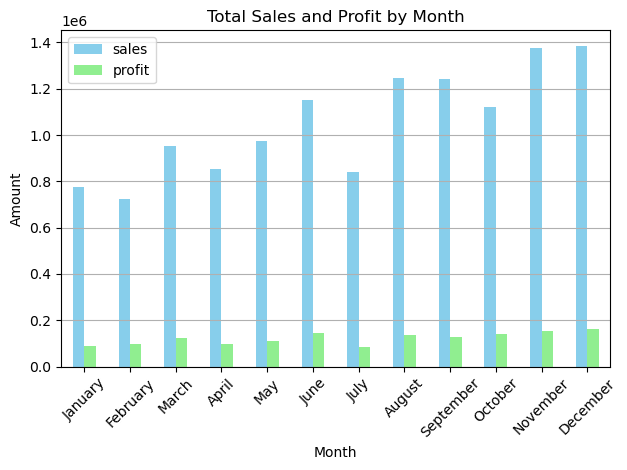

In [65]:
monthly_sales_t = df.groupby('month_name')[['sales', 'profit']].sum()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_sales_t = monthly_sales_t.reindex(month_order)

plt.figure(figsize=(15, 5))
monthly_sales_t.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Total Sales and Profit by Month")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

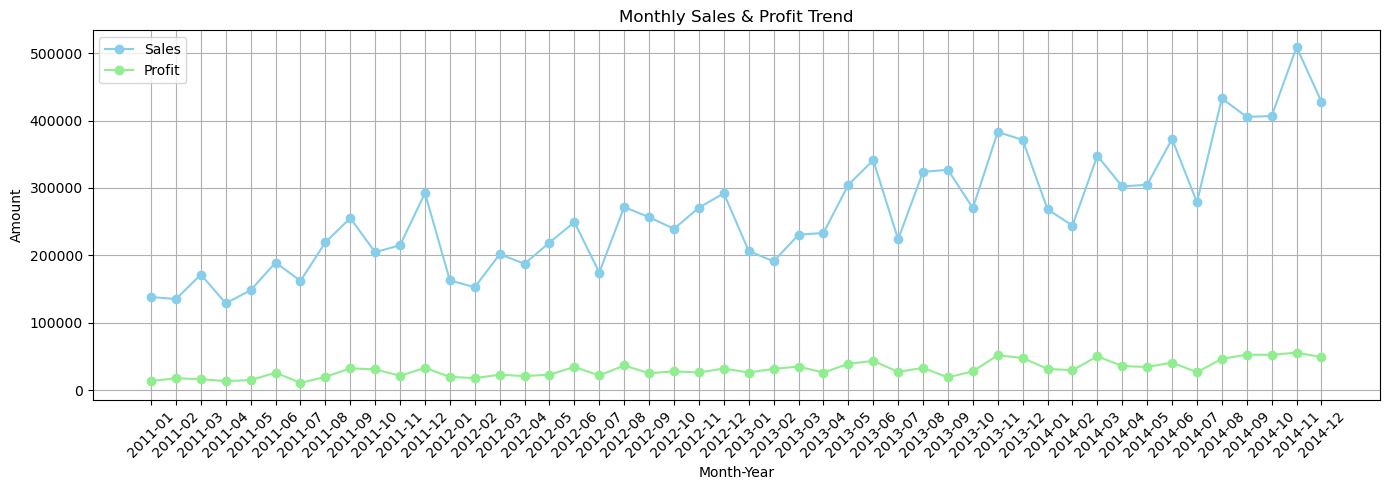

In [66]:
df_monthly = df.groupby('order_month_year')[['sales', 'profit']].sum()

plt.figure(figsize=(14,5))

plt.plot(df_monthly.index, df_monthly['sales'], marker='o', color='skyblue', label='Sales')
plt.plot(df_monthly.index, df_monthly['profit'], marker='o', color='lightgreen', label='Profit')

plt.title("Monthly Sales & Profit Trend")
plt.xlabel("Month-Year")
plt.ylabel("Amount")
plt.xticks(ticks=range(len(df_monthly.index)), labels=df_monthly.index, rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

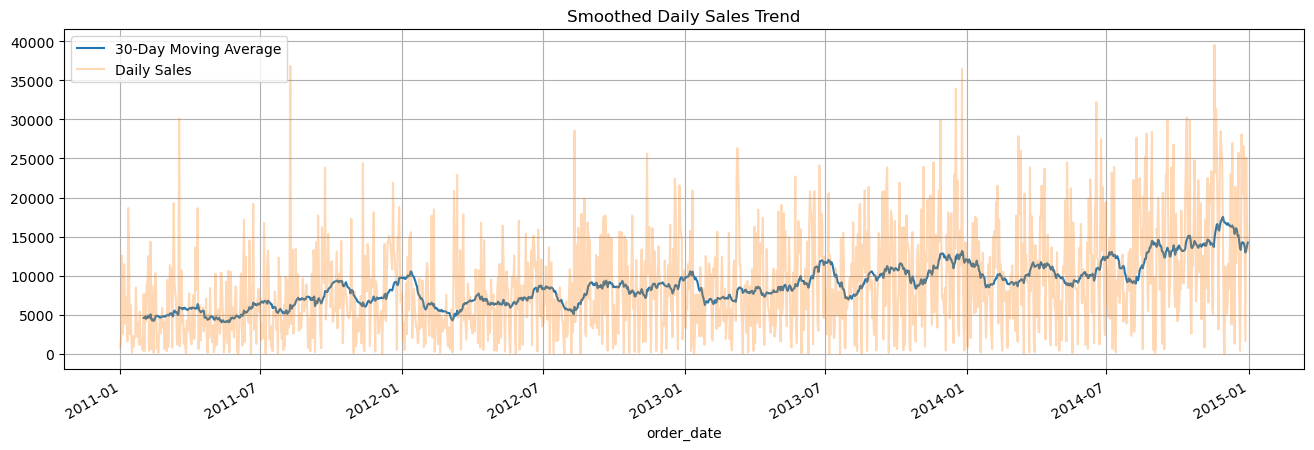

In [67]:
df = df.sort_values('order_date')

daily_sales = df.groupby('order_date')['sales'].sum().reset_index()
daily_sales = daily_sales.set_index('order_date')

plt.figure(figsize=(16,5))
daily_sales['sales'].rolling(window=30).mean().plot(label='30-Day Moving Average')
daily_sales['sales'].plot(alpha=0.3, label='Daily Sales')
plt.title("Smoothed Daily Sales Trend")
plt.legend()
plt.grid()
plt.show()

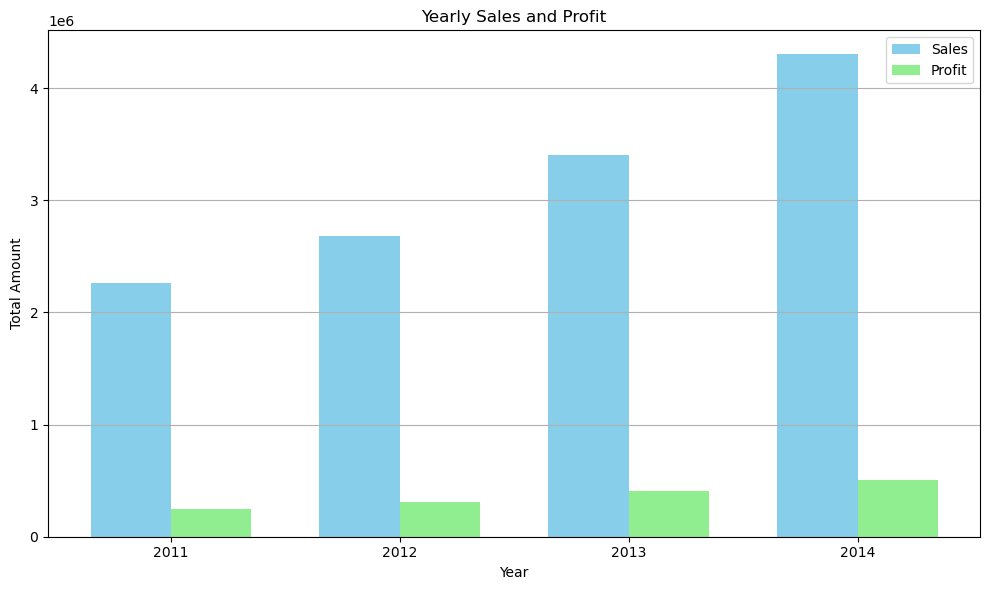

In [68]:
# Grouping by year to get total sales and profit
yearly_s_p = df.groupby('order_year')[['sales', 'profit']].sum()

x = np.arange(len(yearly_s_p.index))

width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, yearly_s_p['sales'], width=width, color='skyblue', label='Sales')
plt.bar(x + width/2, yearly_s_p['profit'], width=width, color='lightgreen', label='Profit')

plt.title("Yearly Sales and Profit")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.xticks(x, yearly_s_p.index)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\alire\AppData\Local\Temp\ipykernel_12960\3753537951.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_sales, x='segment', y='sales', palette='Set2')


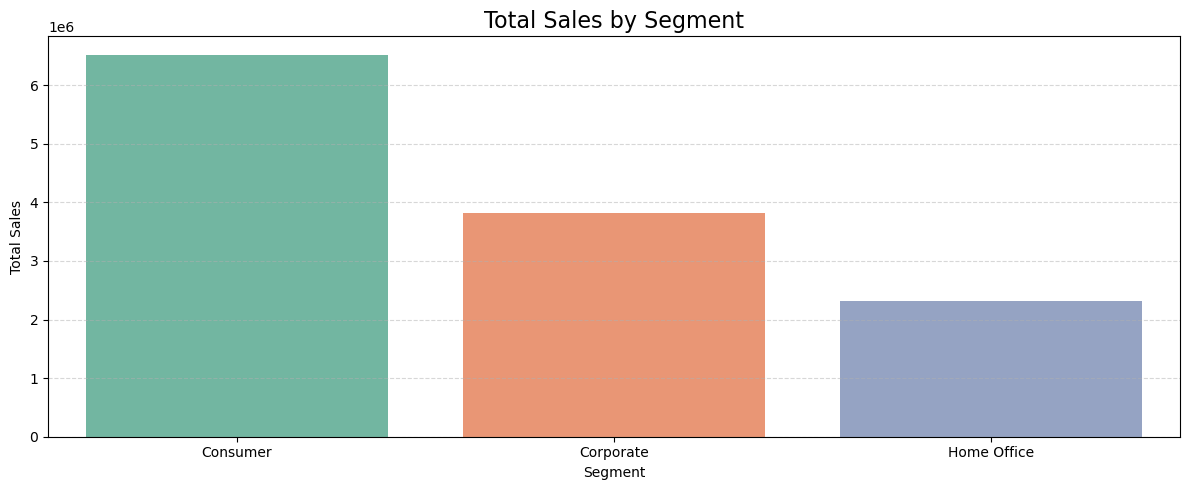

In [69]:
# Sales by Segment
plt.figure(figsize=(12, 5))
segment_sales = df.groupby('segment')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
sns.barplot(data=segment_sales, x='segment', y='sales', palette='Set2')
plt.title('Total Sales by Segment', fontsize=16)
plt.xlabel('Segment')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

C:\Users\alire\AppData\Local\Temp\ipykernel_12960\157276190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='region', y='sales', palette='pastel')


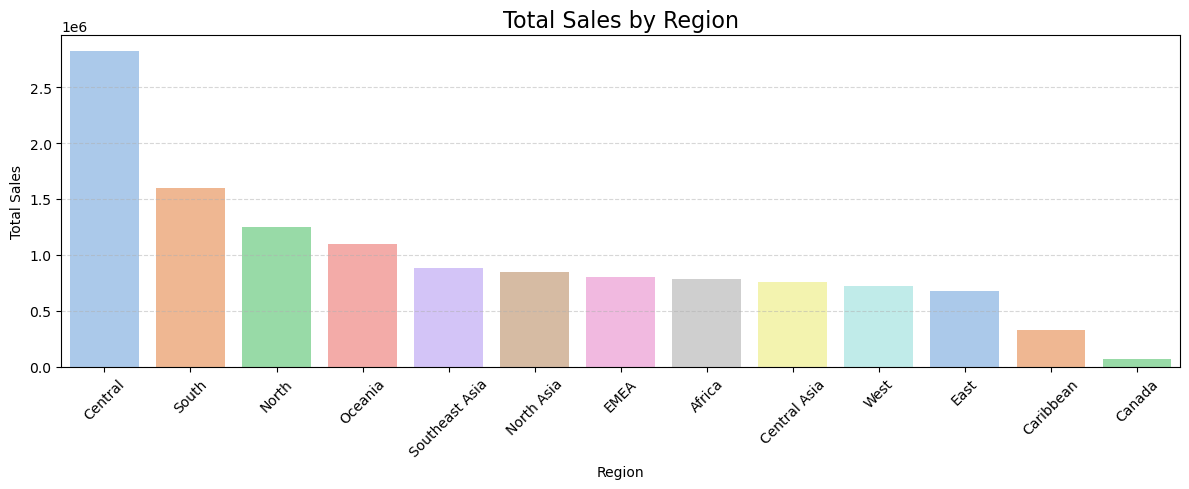

In [70]:
# Sales by Region
plt.figure(figsize=(12, 5))
region_sales = df.groupby('region')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

sns.barplot(data=region_sales, x='region', y='sales', palette='pastel')

plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

C:\Users\alire\AppData\Local\Temp\ipykernel_12960\4203887733.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='category', y='sales', palette='viridis')


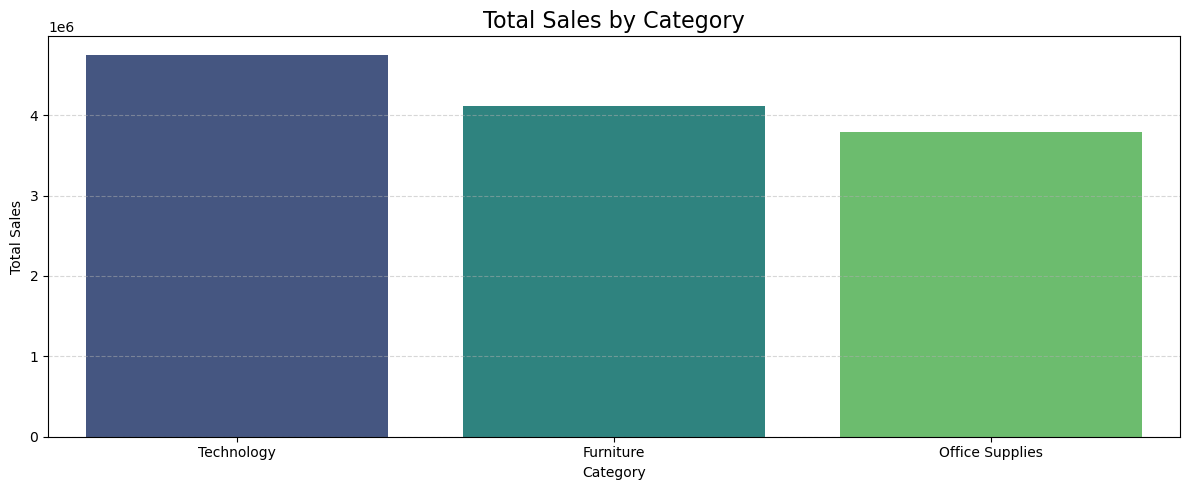

In [71]:
# Sales by Category
plt.figure(figsize=(12, 5))

category_sales = df.groupby('category')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

sns.barplot(data=category_sales, x='category', y='sales', palette='viridis')

plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

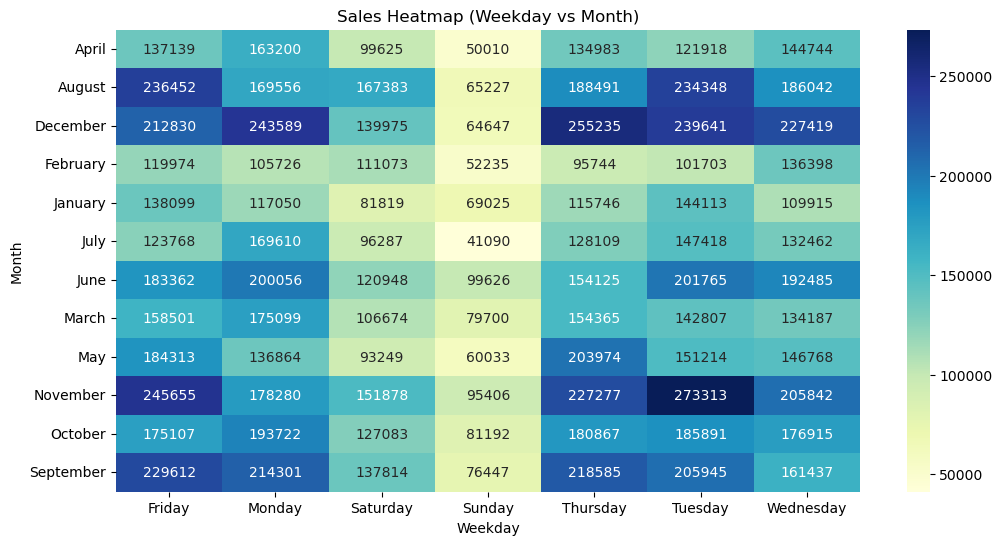

In [72]:
heat_df = df.groupby(['month_name', 'order_weekday'])['sales'].sum().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heat_df, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Sales Heatmap (Weekday vs Month)")
plt.xlabel("Weekday")
plt.ylabel("Month")
plt.show()